In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

file_path = "C:/Users/Disha Devatha/Downloads/GymDataset.csv"
data = pd.read_csv(file_path)
print(data.head())
data.isnull().sum()

   Age  Gender  Weight (kg)  Height (m)  Session_Duration (hours)  \
0   56    Male         88.3        1.71                      1.69   
1   46  Female         74.9        1.53                      1.30   
2   32  Female         68.1        1.66                      1.11   
3   25    Male         53.2        1.70                      0.59   
4   38    Male         46.1        1.79                      0.64   

   Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  \
0             1313         Yoga            12.6                    3.5   
1              883         HIIT            33.9                    2.1   
2              677       Cardio            33.4                    2.3   
3              532     Strength            28.8                    2.1   
4              556     Strength            29.2                    2.8   

   Workout_Frequency (days/week)    BMI  
0                              4  30.20  
1                              4  32.00  
2             

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       8
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   8
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              6
dtype: int64

In [5]:
data.fillna({
    'Fat_percentage': data['Fat_Percentage'].mean(),
    'Height (m)': data['Height (m)'].mean(),
    'BMI': data['BMI'].mean(),
}, inplace=True
)

if 'Fat_Percentage' in data.columns:
    data['Fat_Percentage'] = data['Fat_Percentage'].fillna(data['Fat_Percentage'].mode()[0])

data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              0
dtype: int64

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Fix encoding errors and clean categorical columns
data = data.apply(lambda col: col.astype(str) if col.dtypes == 'object' else col)

# Encode categorical columns
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Check the encoded dataset
print("Encoded Dataset Preview:")
print(data.head())

# Save the encoded file to Desktop
output_path = "C:/Users/Disha Devatha/Downloads/GymDataset_Encoded.csv"
data.to_csv(output_path, index=False)

print(f"Encoded dataset saved to: {output_path}")


Encoded Dataset Preview:
   Age  Gender  Weight (kg)  Height (m)  Session_Duration (hours)  \
0   56       1         88.3        1.71                      1.69   
1   46       0         74.9        1.53                      1.30   
2   32       0         68.1        1.66                      1.11   
3   25       1         53.2        1.70                      0.59   
4   38       1         46.1        1.79                      0.64   

   Calories_Burned  Workout_Type  Fat_Percentage  Water_Intake (liters)  \
0             1313             3            12.6                    3.5   
1              883             1            33.9                    2.1   
2              677             0            33.4                    2.3   
3              532             2            28.8                    2.1   
4              556             2            29.2                    2.8   

   Workout_Frequency (days/week)    BMI  
0                              4  30.20  
1                        

In [7]:
file_path = "C:/Users/Disha Devatha/Downloads/GymDataset_Encoded.csv"
df = pd.read_csv(file_path)
print(df.head())
df.isnull().sum()

   Age  Gender  Weight (kg)  Height (m)  Session_Duration (hours)  \
0   56       1         88.3        1.71                      1.69   
1   46       0         74.9        1.53                      1.30   
2   32       0         68.1        1.66                      1.11   
3   25       1         53.2        1.70                      0.59   
4   38       1         46.1        1.79                      0.64   

   Calories_Burned  Workout_Type  Fat_Percentage  Water_Intake (liters)  \
0             1313             3            12.6                    3.5   
1              883             1            33.9                    2.1   
2              677             0            33.4                    2.3   
3              532             2            28.8                    2.1   
4              556             2            29.2                    2.8   

   Workout_Frequency (days/week)    BMI  
0                              4  30.20  
1                              4  32.00  
2       

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              0
dtype: int64

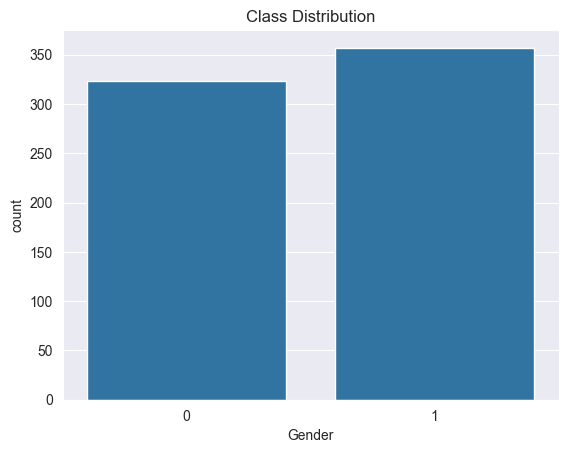

In [8]:
# Visualizing class distribution
sns.countplot(x='Gender', data=df)
plt.title('Class Distribution')
plt.show()

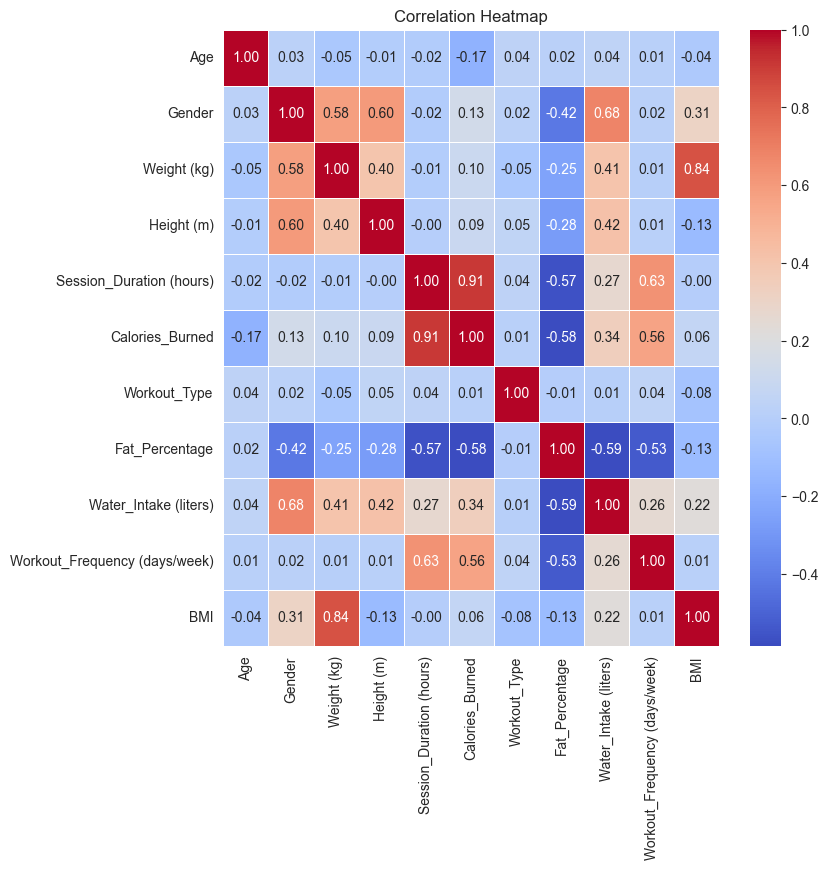

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Separate features and target
X = data.drop(columns=['Workout_Type'])
y = data['Workout_Type']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Train Gaussian Naive Bayes classifier
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
gaussian_preds = gaussian_nb.predict(X_test)

In [13]:
# Train Multinomial Naive Bayes classifier
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)
multinomial_preds = multinomial_nb.predict(X_test)

In [14]:
# Check accuracy scores
gaussian_accuracy = accuracy_score(y_test, gaussian_preds)
multinomial_accuracy = accuracy_score(y_test, multinomial_preds)
print(f"Gaussian Naive Bayes Accuracy: {gaussian_accuracy:.2f}")
print(f"Multinomial Naive Bayes Accuracy: {multinomial_accuracy:.2f}")

Gaussian Naive Bayes Accuracy: 0.28
Multinomial Naive Bayes Accuracy: 0.24


In [15]:
from sklearn.model_selection import cross_val_predict

# Confusion matrix with cross-validation
gaussian_cv_preds = cross_val_predict(GaussianNB(), X, y, cv=5)
multinomial_cv_preds = cross_val_predict(MultinomialNB(), X, y, cv=5)

print("Confusion Matrix (Gaussian Naive Bayes):")
print(confusion_matrix(y, gaussian_cv_preds))
print("\nConfusion Matrix (Multinomial Naive Bayes):")
print(confusion_matrix(y, multinomial_cv_preds))

Confusion Matrix (Gaussian Naive Bayes):
[[47 28 75 26]
 [43 22 74 16]
 [46 31 92 22]
 [44 23 71 20]]

Confusion Matrix (Multinomial Naive Bayes):
[[74 25 59 18]
 [56 18 60 21]
 [63 29 64 35]
 [65 23 47 23]]


In [20]:
from itertools import cycle
from sklearn.preprocessing import label_binarize

# ROC Curve for Multiclass
def plot_multiclass_roc(y_test, y_proba, model_name, num_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


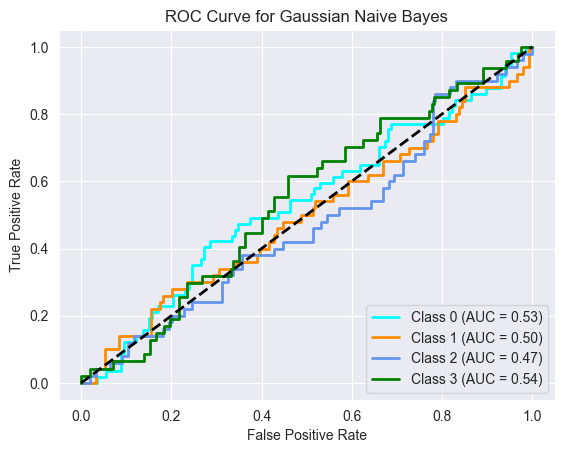

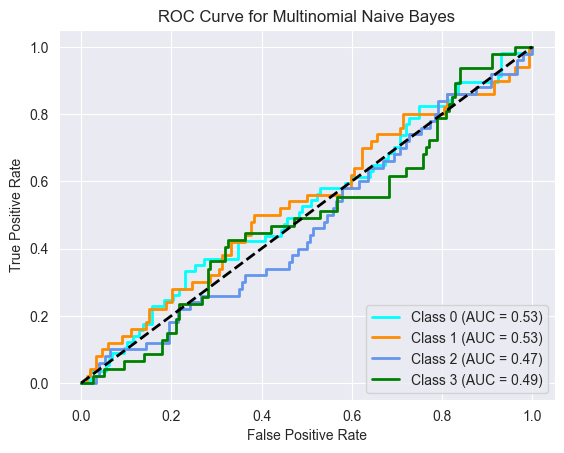

In [22]:
gaussian_proba = gaussian_nb.predict_proba(X_test)
multinomial_proba = multinomial_nb.predict_proba(X_test)

num_classes = len(np.unique(y))

plot_multiclass_roc(y_test, gaussian_proba, "Gaussian Naive Bayes", num_classes)
plot_multiclass_roc(y_test, multinomial_proba, "Multinomial Naive Bayes", num_classes)

In [23]:
from sklearn.metrics import classification_report

# Interpretation
print("\nClassification Report (Gaussian Naive Bayes):")
print(classification_report(y_test, gaussian_preds))
print("\nClassification Report (Multinomial Naive Bayes):")
print(classification_report(y_test, multinomial_preds))



Classification Report (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.32      0.32      0.32        57
           1       0.33      0.12      0.18        50
           2       0.27      0.54      0.36        50
           3       0.19      0.13      0.15        47

    accuracy                           0.28       204
   macro avg       0.28      0.28      0.25       204
weighted avg       0.28      0.28      0.26       204


Classification Report (Multinomial Naive Bayes):
              precision    recall  f1-score   support

           0       0.29      0.47      0.36        57
           1       0.20      0.02      0.04        50
           2       0.21      0.34      0.26        50
           3       0.12      0.06      0.08        47

    accuracy                           0.24       204
   macro avg       0.21      0.22      0.18       204
weighted avg       0.21      0.24      0.19       204

